<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 



Входные данные сервиса Яндекс Недвижимость — `real_estate_data.csv `.

Ход работы:
* Изучение данных.
* Предобработка данных.
* Расчёт дополнительных параметров.
* Проведение исследований и ответы на вопросы.
* Выводы.

## Изучение данных из файла

Импортируем pandas и библиотеку для графиков

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #импорт библиотек лучше делать в одном месте

Прочитаем файл `real_estate_data.csv` из папки `/datasets` и сохраним его в переменной `data`:

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  #данные склеились в одну строку, поэтому добавим разделитель

Выведем на экран первые 10 строк таблицы:

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

### Вывод

В таблице 22 столбца. Тип данных:  — 3 `object`, 3 столбца целочисленные значения тип - `int64`, 14 столбцов вещественные - `float64` и 2 столбца булевых значений. Всего 23699 строк. 

В данных есть пропущенные значения. Для каждого столбца, где есть пропуск нужно своё решение - заполним пропуски где это уместо, где нет подходящего решения на замену оставим как есть. 

Неоходимо привести данные некоторых столбцов в другой тип, например: **число комнат** - в int(количество комнат всегда имеет челочисленный вид), **количество этажей** в доме тоже должно быть типа int, **`is_apartment`** - согласно документации это булев тип, но вывод данных говорит о типе object, значит нужно перевести тип object в bool, **число балконов** тоже нужно перевести в тип int(врядли полтора балкона норма), **`days_exposition`** - здесь для удобства тоже стоит сделать целочисленный вид.

## Предобработка данных

In [5]:
data.isna().mean() # посчитаем пропущенные значения 

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Так, столбец locality_name имеет незначительное количество пропусков менее 1%, удалим эти данные. В столбце floors_total также незначительное количество пропусков - сделаем тоже самое.

In [6]:
data.dropna(subset=['locality_name', 'floors_total'], inplace=True) #удаляем nan в locality_name и floors_total

Значения ceiling_height (высоты потолков) имеют большой вес в таблице и необходимы при анализе. Заменим пропущенные значения на медианные. (Средняя высота и медианная почти не отличаются, для заполения пустых можно принять любую из них)

In [7]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data['ceiling_height'].isna().sum()  #проверяем

0

In [8]:
data['is_apartment'] = data['is_apartment'].astype('bool') #переводим тип данных

In [9]:
data['rooms'] = data['rooms'].astype('int') #переводим тип данных

In [10]:
#если человек не указал число балконов — скорее всего, их нет
data['balcony'] = data['balcony'].fillna(0) # заполняем пропуски балкона 0 - нет балкона
data['balcony'] = data['balcony'].astype('int') #переводим тип данных

In [11]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['days_exposition'] = data['days_exposition'].astype('int') #переводим тип данных

Как правило, есть нормативы, по которым есть чёткая регламентация жилой площади на человека, но в массиве данных есть квартиры свободной планировки, поэтому пропущенные значения заполняем медианными сгруппированным относительно количества комнат.

In [12]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform("median"))
data['living_area'].isna().sum() #проверяем

0

In [13]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median()) #заполняем средним
data['kitchen_area'].isna().sum() #проверяем

0

In [14]:
#data['chek_area'] = data['kitchen_area'] + data['living_area'] < data['total_area']
#data['chek_area'].value_counts()

In [15]:
data = data.loc[data['total_area'] > (data['kitchen_area'] + data['living_area'])]

In [16]:
#data #проверяем

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23084 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23084 non-null  int64  
 1   last_price            23084 non-null  float64
 2   total_area            23084 non-null  float64
 3   first_day_exposition  23084 non-null  object 
 4   rooms                 23084 non-null  int64  
 5   ceiling_height        23084 non-null  float64
 6   floors_total          23084 non-null  float64
 7   living_area           23084 non-null  float64
 8   floor                 23084 non-null  int64  
 9   is_apartment          23084 non-null  bool   
 10  studio                23084 non-null  bool   
 11  open_plan             23084 non-null  bool   
 12  kitchen_area          23084 non-null  float64
 13  balcony               23084 non-null  int64  
 14  locality_name         23084 non-null  object 
 15  airports_nearest   

На примере с ниже перечисленными столбцами не очень ясна природа происхождения NaN. Возможно проблема в техническом сбое или при заполнениении данных такой информации просто не было.

Столбцы: 
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м) 
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest — расстояние до центра города (м)

оставим с пропусками , так как корректно мы их заполнить не можем, а для проекта и выводов данные не пригодятся. И Nan можно использовать в математических операциях.

## Расчёты и добавление результатов в таблицу

Рассчитаем стоимость квадратного метра. Стоимость за квадратный метр, как правило, целое значение, поэтому округлим полученные данные, приведя к целочисленному виду.

In [18]:
data['price_m2'] = data['last_price'] / data['total_area']
data['price_m2'] = data['price_m2'].astype(int)

Добавим в таблицу день недели, месяц и год публикации объявления.

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #преобразуем формат

In [20]:
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [21]:
data.head(3) #проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,16028.0,1.0,482.0,2.0,755.0,95,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,18603.0,0.0,NaN,0.0,NaN,81,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,13933.0,1.0,90.0,2.0,574.0,558,92785,3,8,2015


Добавим в таблицу этаж квартиры; варианты — первый, последний, другой. Для этого напишем функцию

In [22]:
def floor_insert(row): 
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['category_floor'] = data.apply(floor_insert, axis=1) #новый столбец - категории этажа: первый, последний, другой 

In [23]:
data.head(3) #проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,category_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,1.0,482.0,2.0,755.0,95,120370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,0.0,NaN,0.0,NaN,81,82920,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,1.0,90.0,2.0,574.0,558,92785,3,8,2015,другой


Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [24]:
data['living_ratio'] = (data['living_area'] / data['total_area']).round(2)
data['kitchen_ratio'] = (data['kitchen_area'] / data['total_area']).round(2)

In [25]:
data.head(3) #проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,category_floor,living_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,2.0,755.0,95,120370,3,3,2019,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,0.0,NaN,81,82920,1,12,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,2.0,574.0,558,92785,3,8,2015,другой,0.61,0.15


**Вывод:** Все данные для проведения анализа подготовлены.

## Исследовательский анализ данных

**Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Строим гистограммы для каждого параметра.**

<AxesSubplot:>

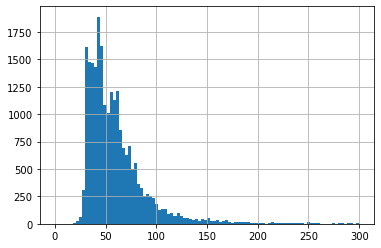

In [26]:
data['total_area'].hist(bins=100, range=(0,300))

Из графика видно, что больше всего квартир с площадями 30-47 кв.м - это, похоже, самые популярные 1 и 2-х комнатные. Далее идут скорее всего 2 и 3 комнатные с площадью до 75 кв.м. Чем больше площадь, тем квартир меньше. 

<AxesSubplot:>

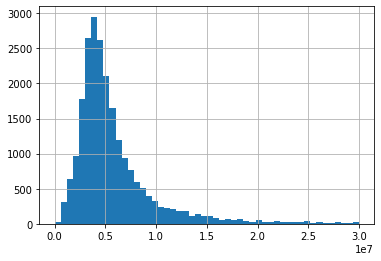

In [27]:
data['last_price'].hist(bins=50, range=(0,30000000))

Больше всего квартир продаются по цене в диапазоне 2,8-5 млн.руб. Пик же продажи квартир идет в по цене около 3,8 мнн. А в остальных случаях чем ниже и чем выше цена интерес пропорционально падает. 

<AxesSubplot:>

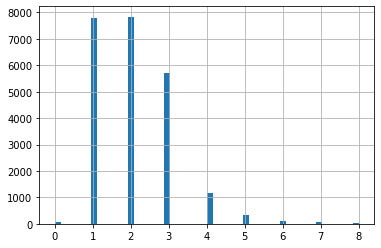

In [28]:
data['rooms'].hist(bins=50,range=(0,8))

Самые популярные квартиры - 1к. и 2к. (около 8000). 3 комнатных, тоже довольно много - чуть меньше 6000, ну а дальше количество сильно сокращаетя. Чем больше комнат, тем меньше таких квартир. 

<AxesSubplot:>

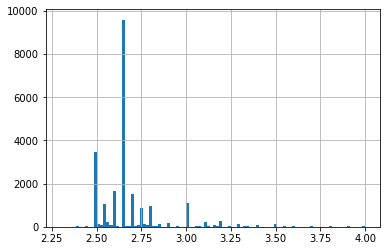

In [29]:
data['ceiling_height'].hist(bins=100, range=(2.3,4))

Больше всего продаж квартир с высотой потока 2,6 м.

**Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану.** 

<AxesSubplot:>

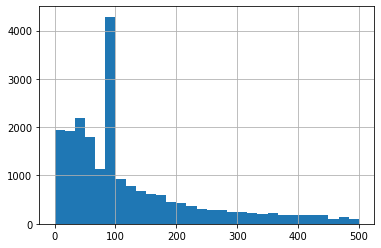

In [30]:
data['days_exposition'].hist(bins=30,range=(0,500))

Больше всего продаж квартир на 95 день.

In [31]:
data['days_exposition'].describe() #изучим данные

count    23084.000000
mean       170.274259
std        207.213483
min          1.000000
25%         46.000000
50%         95.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64

Из приведенных значений (из верхней гистограммы) можно сделать вывод, что продажа квартиры занимает 95 дней - около 3 месяцев - это правдоподобные данные. Все что продается до 40 дней можно назвать быстрой продажей (находится до первого пика средней гистограммы). Необычайно долгие продажи начинаются от 1,5 лет.

Медиана имеет значение  - 95.
Среднее значение - 169,2.

**Уберём редкие и выбивающиеся значения. Опишем особенности. Посмотрим какие факторы больше всего влияют на стоимость квартиры**

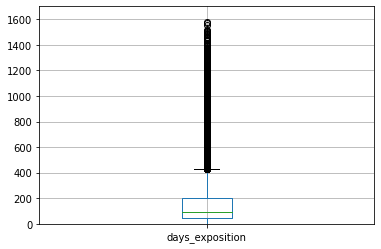

In [32]:
plt.ylim(0,1700) #построим диаграмму размаха со всеми выбросами
data.boxplot(column='days_exposition') 
plt.show()

In [33]:
data.sort_values(by='days_exposition',ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,category_floor,living_ratio,kitchen_ratio
18843,11,3500000.0,48.2,2014-12-15,2,2.50,5.0,27.4,2,True,...,NaN,NaN,1580,72614,0,12,2014,другой,0.57,0.16
1109,1,34878556.0,95.8,2014-12-09,2,2.65,6.0,58.3,5,True,...,3.0,569.0,1572,364076,1,12,2014,другой,0.61,0.21
9553,11,10600000.0,80.0,2014-12-09,3,2.85,17.0,44.0,9,True,...,0.0,NaN,1553,132500,1,12,2014,другой,0.55,0.19
1885,2,13300000.0,79.6,2014-12-09,2,3.00,8.0,42.7,7,True,...,0.0,NaN,1513,167085,1,12,2014,другой,0.54,0.23
20969,18,13300000.0,133.0,2015-02-11,4,3.00,5.0,58.0,2,True,...,1.0,534.0,1512,100000,2,2,2015,другой,0.44,0.34


In [34]:
current_days_exposition = data.query('days_exposition<420') 
#убрали выбросы находящиеся за 1.5 межквартальным интервалом, добавленного к Q3

<AxesSubplot:>

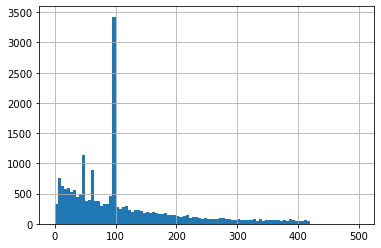

In [35]:
current_days_exposition['days_exposition'].hist(bins=100,range=(0,500))

Убираем выбросы находящиеся за 1.5 межквартальным интервалом, добавленного к Q3. Всего наблюдается 4 пика. Самый большой пик- 95 дней, есть еще пики 50 дней, 70 дней и 10 дней. Большая часть выбросов лежит за диапазоном 420 дней и они стремяться к 0. Стоит их удалить.

<AxesSubplot:>

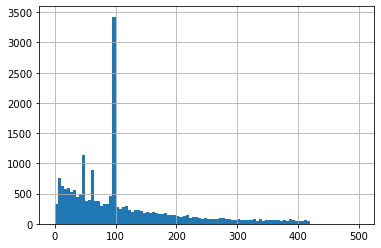

In [36]:
current_days_exposition['days_exposition'].hist(bins=100,range=(0,500))

На диаграмме размаха видно, что в выбросы попадают квартиры свыше 11 млн. руб.

Ещё раз изучив таблицу, кажутся неправильными значения меньше 1 000 000 за квартиру. Также возьмём это в условие.

In [37]:
current_days_exposition = current_days_exposition.query('1000000 < last_price < 11000000') 
#убираем выбросы 

<AxesSubplot:>

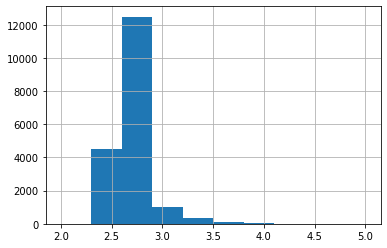

In [38]:
current_days_exposition['ceiling_height'].hist(bins=10,range=(2,5))

In [39]:
current_days_exposition = current_days_exposition.query('2.5 < ceiling_height < 3.2') 
#убираем выбросы. 
#Касательно потолков: По нормативу потолки должны быть не ниже 2,5, в Спб в старом фонде есть потолки высотой 4,2-5 м. 
#но наверное для текущего анализа правильно задать условие от 2,5 до 3,2, судя по графику

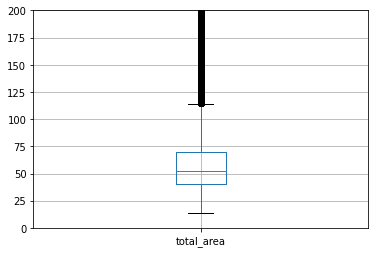

In [40]:
plt.ylim(0,200) #построим диаграмму размаха 
data.boxplot(column='total_area') 
plt.show()

Ранее уже делала вывод, что наиболее популярные по площади квартиры от 30 до 75. Используем это чтобы убрать выбросы.


In [41]:
current_days_exposition = current_days_exposition.query('30.0 < total_area < 105')

<AxesSubplot:xlabel='last_price'>

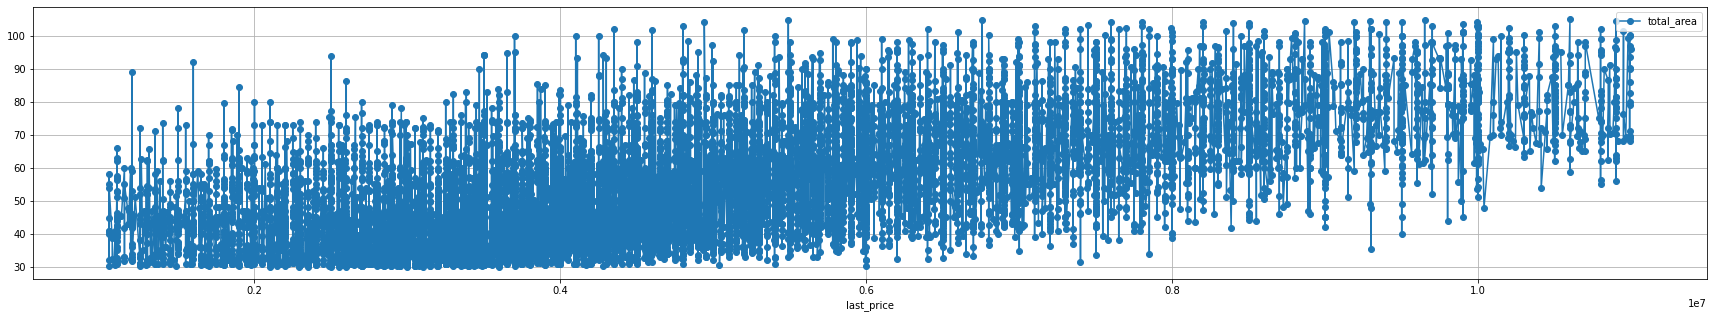

In [42]:
(current_days_exposition
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='total_area',grid=True, style='o-',figsize=(30,5))
)

In [43]:
current_days_exposition['last_price'].corr(current_days_exposition['total_area'])

0.6656325869749224

При увеличении площади, увеличивается стоимость квартиры. Стоимость квартиры коррелирует с площадью на коэфф. Пирсона 0.67. Значит сильно зависят эти величины друг от друга. Положительная корреляция.

<AxesSubplot:xlabel='rooms'>

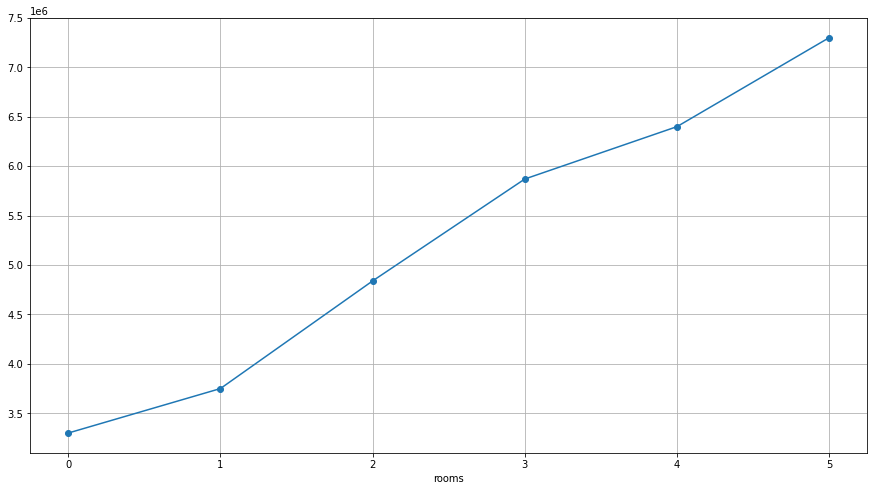

In [44]:
(current_days_exposition
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),alpha=1)
)

На этом графике видно, что при увеличении количества комнат, увеличивается стоимость. Но это и логично потому, что увеличивается площадь квартиры.

In [45]:
current_days_exposition['last_price'].corr(current_days_exposition['rooms'])

0.4094079010629315

Коэффициент Пирсона 0.40. Положительная корреляция цены и количества комнат. Однако стоимость не зависит от количества комнат.

In [46]:
current_days_exposition['floor'].corr(current_days_exposition['last_price'])

0.13905607522643695

<AxesSubplot:xlabel='category_floor'>

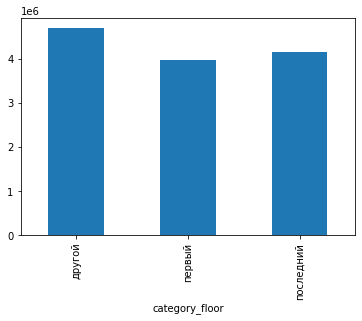

In [47]:
(current_days_exposition
    .groupby('category_floor')['last_price'].median()
    .plot(x='category_floor',y='last_price',kind='bar')
)

Цена не зависит от этажа, на котором располагается квартира. Как правило, цена квартир на первых и последних этажах всегда чуть ниже.

<AxesSubplot:xlabel='cityCenters_nearest'>

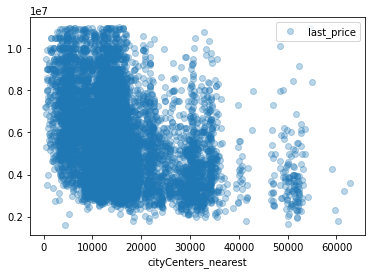

In [48]:
(current_days_exposition
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)

In [49]:
current_days_exposition['cityCenters_nearest'].corr(current_days_exposition['last_price'])

-0.3177167031799061

Очень большой разброс, но можно увидеть плотности, которые показывают, что при увеличении расстояния, стоимость уменьшается не сильно, поэтому и корреляция отрицательная. 

<AxesSubplot:xlabel='day'>

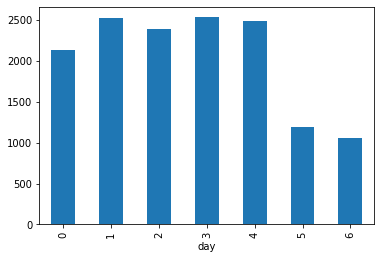

In [50]:
(current_days_exposition
     .groupby('day')['last_price'].count()
     .plot(x='day',y='last_price',kind='bar')
)

Меньше всего объявлений закрывается в выходные.

<AxesSubplot:xlabel='month'>

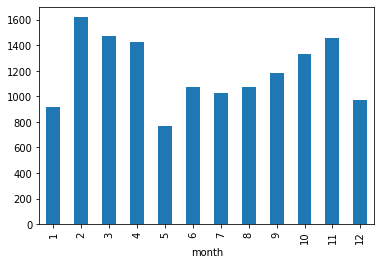

In [51]:
(current_days_exposition
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',kind='bar')
)

Скорее всего такая тенденция прослеживается из-за того что в мае, декабре-январе много празников.

<AxesSubplot:xlabel='year'>

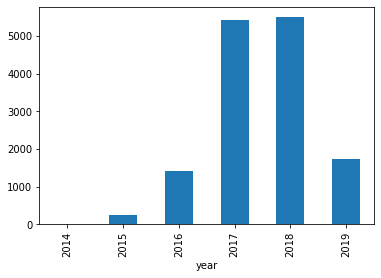

In [52]:
(current_days_exposition
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',kind='bar')
)

Больше всего продаж в 2017 и 2018 году.

В целом цена не зависит от дня недели, месяца и года размещения объявления.

In [53]:
current_days_exposition[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.665633,0.409408,-0.317717
total_area,0.665633,1.000000,0.803577,-0.075576
rooms,0.409408,0.803577,1.000000,-0.053354
cityCenters_nearest,-0.317717,-0.075576,-0.053354,1.000000


**Выводы:**

**Больше всего на стоимость квартиры влияет её площадь. Вообще местоположение один из основополагающих факторов стоимости недвижимости, но в данной выборке влияние удаленность от центра не оказывает. Количество комнат также не имеет сильного влияния на цену. Можно отметить, что первый и последний этажи мало кто любит и цена их отличается от остальных. Дата же размещения не оказывает влияния на цену.**

In [54]:
top_location = current_days_exposition.pivot_table(index='locality_name',values='price_m2',aggfunc=('count','mean'))
top_location.sort_values(by='count',ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,9194.0,105678.314118
посёлок Мурино,401.0,84727.376559
посёлок Шушары,352.0,77445.778409
Всеволожск,303.0,67573.953795
посёлок Парголово,275.0,89968.538182
деревня Кудрово,228.0,91784.714912
Пушкин,217.0,100776.078341
Колпино,203.0,75066.325123
Гатчина,189.0,69022.253968


Больше всего объявлений в СПб. Остальные локации считаются пригородами города, они менее престижны, но здесь ведется активная застройка "муравейниками". 

Логично, что в Санкт-Петербурге самая большая стоимость 1м.кв.

In [55]:
spb = data.loc[data['locality_name'] == 'Санкт-Петербург', ['last_price', 'cityCenters_nearest']].reset_index(drop=True) 
spb['dist_center_km'] = (spb['cityCenters_nearest']/1000).round(0) 
#cоздаём столбец с расстоянием до центра в километрах и округляем

In [56]:
price_km_spb = spb.pivot_table(index='dist_center_km', values='last_price', aggfunc='mean') #посчитаем среднюю цену для каждого километра

<AxesSubplot:xlabel='dist_center_km'>

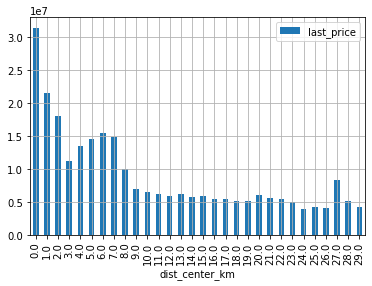

In [57]:
price_km_spb.plot(kind='bar', grid=True)

На расстоянии до 1 км от центра цена очень высока и сильно меняется уже после 1 км. Это и есть самый центр города. 
Есть еще одна граница, она находится в районе 8 км от центра, после которой следует сильное падение цены. Это можно назвать центральной зоной (в радиусе 8 км от центра).

(Вообще, распределение нужно делать по районам города, но это к исследованию не относится =)

In [58]:
spb_center = current_days_exposition.query('cityCenters_nearest < 8000 ') #cегмент квартир в центре
spb_all = current_days_exposition.query('locality_name == "Санкт-Петербург"') #квартира во всем городе

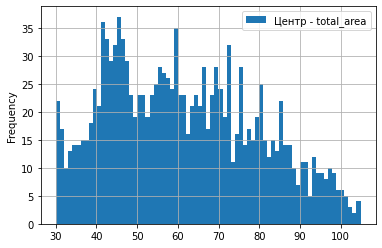

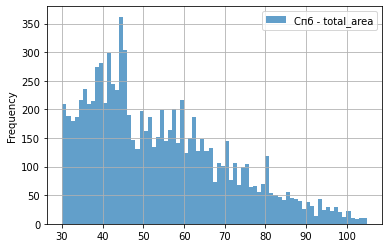

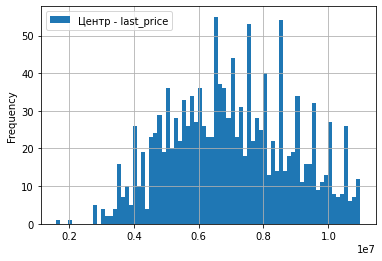

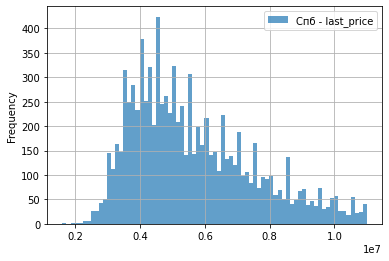

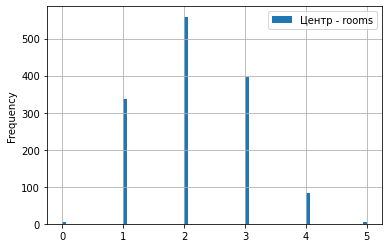

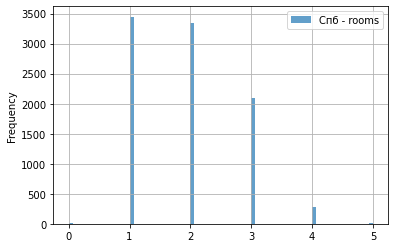

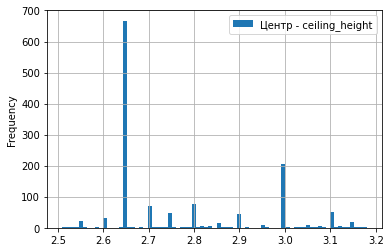

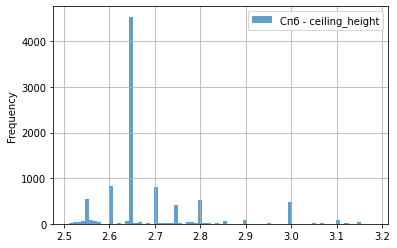

In [59]:
for col in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    spb_center.plot(y=col, kind='hist', grid=True, bins=75, alpha=1, legend=True, label='Центр - '+col);
    spb_all.plot(y=col, kind='hist', grid=True, bins=75, alpha=0.7, legend=True, label='Спб - '+col);
    plt.show()

* Доля проданных квартир с большой площадью в Центре значительно выше, нежели по всему Спб
* Цена на квартиры выше в Центре
* Большая доля продаж в Центре приходится на 2-3 комнатные квартиры, а по городу на 1-2 комнатные
* Также можно видеть, что в Центре большая доля проданых квартир с высокими потолками, это потому что в центре города много "старого фонда" и "сталинских" домов, для которых характерны высокие потолки от 3-4 м.

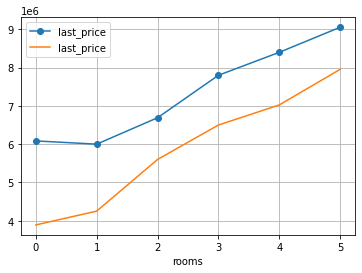

In [60]:
(spb_center
     .sort_values(by='last_price',ascending=True)
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,legend=True)
)

(spb_all
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='-',grid=True,legend=True)
)
plt.show()

C увеличением комнат увеличивается стоимость. Самые дорогие 5 комнатные квартиры.

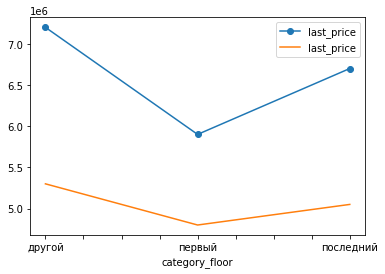

In [61]:
(spb_center
    .groupby('category_floor')['last_price'].median()
    .plot(x='category_floor',y='last_price',style='o-',legend=True)
)

(spb_all
    .groupby('category_floor')['last_price'].median()
    .plot(x='category_floor',y='last_price',style='-',legend=True)
)

plt.show()

На первом этаже квартиры покупают реже всего. В центральном районе они дороже.

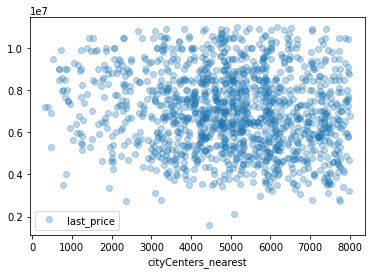

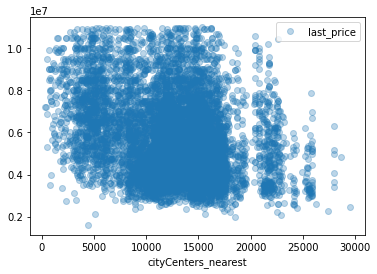

In [62]:
(spb_center
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o', alpha=0.3)
)

(spb_all
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o', alpha=0.3)
)

plt.show()

В районе 4-5 км больше всего квартир, их стоимость 6-8 млн. руб.

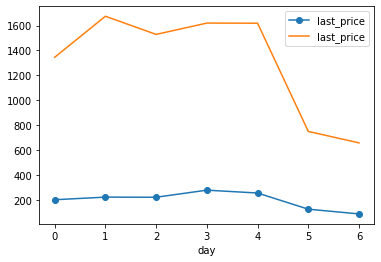

In [63]:
(spb_center
     .groupby('day')['last_price'].count()
     .plot(x='day',y='last_price',style='o-',legend=True)
)

(spb_all
     .groupby('day')['last_price'].count()
     .plot(x='day',y='last_price',style='-',legend=True)
)

plt.show()

В течение недели квартиры продаются примерно одинаково. Выходные - они есть выходные.

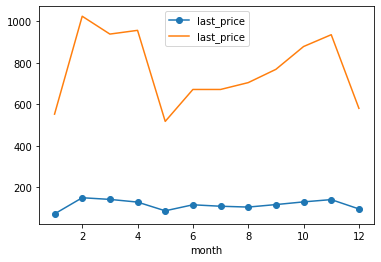

In [64]:
(spb_center
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',style='o-',legend=True)
)

(spb_all
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',style='-',legend=True)
)

plt.show()

Опять же спад продаж характерен для мая, декабря-января, вероятнее из-за праздников.

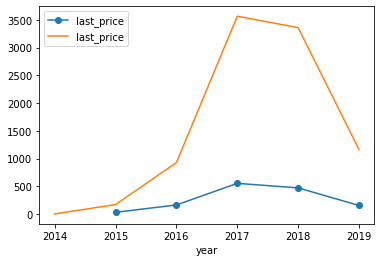

In [65]:
(spb_center
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',style='o-',legend=True)
)

(spb_all
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',style='-',legend=True)
)

plt.show()

2017-2018 годы был подъем продаж.

**Выводы:**
* Количество комнат не сильно влияет на цену в Центре города
* Если в Городе есть слабая зависимость от расстояния от центра, то в Центре такой зависимости нет
* По остальным параметрам зависимости не прослеживаются.

## Общий вывод

В ходе работы была проведена предобработка данных: заполнены соответсвующие пропуски, в случае невозможности их корректных расчётов оставлены пустые значения. Изменены типы данных для удобства восприятия и расчётов.
Также в таблицу добавлены дополнительно рассчитанные данные.

Анализ показал:
* Больше всего квартир с площадями 30-47 кв.м - это, похоже, самые популярные 1 и 2-х комнатные. Далее идут 2 и 3 комнатные с площадью до 75 кв.м. Чем больше площадь, тем квартир меньше. 
* Больше всего квартир продаются по цене в диапазоне 2,8-5 млн.руб. Пик же продажи квартир идет в по цене около 3,8 мнн. А в остальных случаях чем ниже и чем выше цена интерес пропорционально падает. 
* Самые популярные квартиры - 1к. и 2к. (около 8000). 3 комнатных, тоже довольно много - чуть меньше 6000, ну а дальше количество сильно сокращаетя. Чем больше комнат, тем меньше таких квартир.
* Больше всего продаж квартир с высотой потока 2,6 м.
* Продажа квартиры занимает в среднем 95 дней.
* Больше всего на стоимость квартиры влияет её площадь. Среднее влияние оказывает удаленность от центра. Количество комнат также не имеет сильного влияния на цену. Можно отметить, что первый и последний этажи мало кто любит и цена их отличается от остальных. Дата же размещения не оказывает влияния на цену.
* Подавляющее большинство квартир продается в Санкт-Петербурге. Помимо, в Топ10 входят: Мурино, Шушары, Всеволожск, Колпино, Пушкин, Парголово, Гатчина, Кудрово, Выборг.
* В ходе анализа квартир в центре СПб было выявлено, что на расстоянии до 1 км от центра цена очень высока и сильно меняется уже после 1 км. Есть еще одна граница, она находится в районе 8 км от центра, после которой следует сильное падение цены.
* Доля проданных квартир с большой площадью в Центре значительно выше, нежели по всему Городу. Цена на квартиры выше в Центре, чем в целом по городу. Большая доля продаж в Центре приходится на 2-3 комнатные квартиры, а по Городу на 1-2 комнатные. Также можно видеть, что в Центре большая доля проданых квартир с высокими потолками, это потому что в центре города много "старого фонда" и "сталинских" домов, для которых характерны высокие потолки от 3м.
* При сравнении стоимости квартир в центральной части города и в целом по Санкт-Петербургу сильных зависимостей не выявлено. 